In [3]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('/content/heart_disease.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [6]:
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [7]:
#putting feature variable to x
X = df.drop('heart disease', axis=1)

#putting response  variable to y
y = df['heart disease']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)
X_train.shape, X_test.shape

((189, 4), (81, 4))

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [12]:
#importing required packages for visualization

from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [20]:
dot_data = StringIO()

export_graphviz(dt, out_file=dot_data, filled=True, feature_names=X.columns, class_names=['No Disease', 'Disease'])

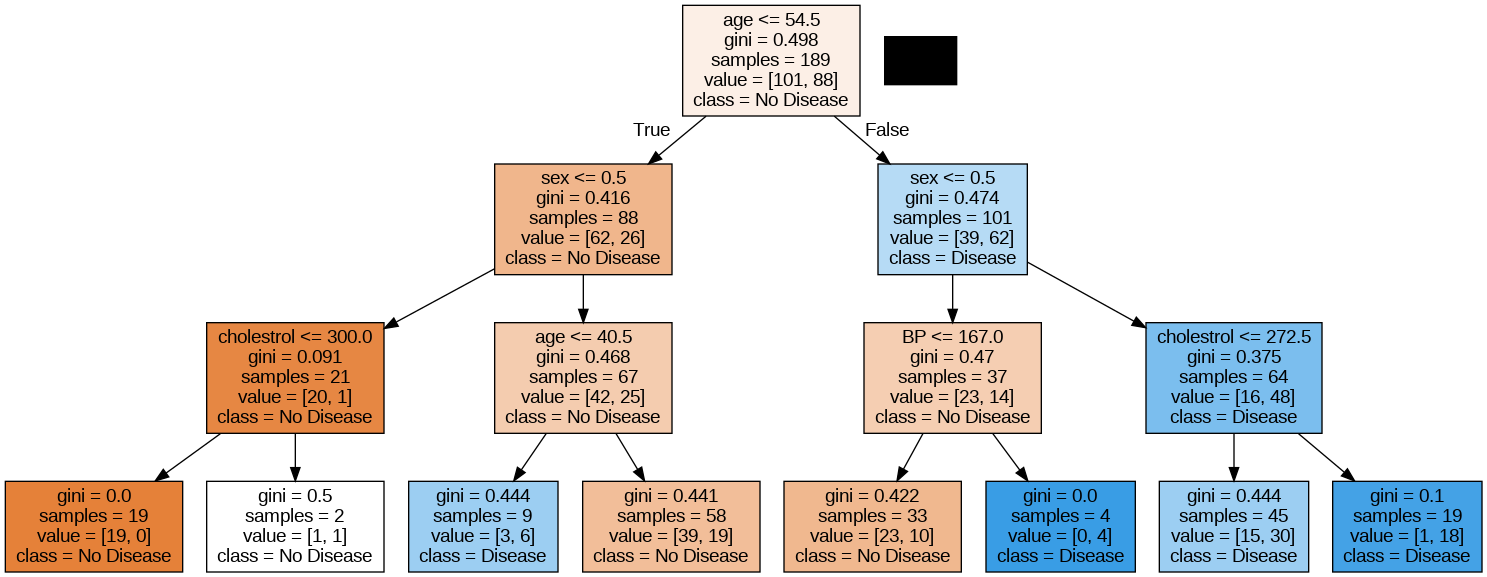

In [14]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [21]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [17]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)


0.7407407407407407


array([[82, 19],
       [30, 58]])

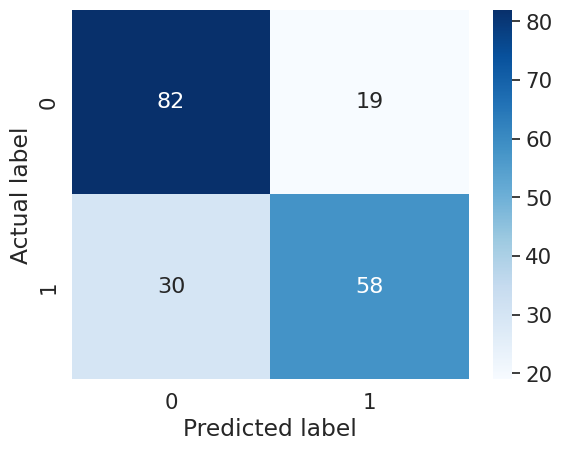

In [18]:
cm1 = confusion_matrix(y_train, y_train_pred)
df_cm1 = pd.DataFrame(cm1, range(2), range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm1, annot=True, cmap='Blues', annot_kws={"size":16}, fmt='g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [19]:
print("classification report -\n", classification_report(y_train, y_train_pred))

classification report -
               precision    recall  f1-score   support

           0       0.73      0.81      0.77       101
           1       0.75      0.66      0.70        88

    accuracy                           0.74       189
   macro avg       0.74      0.74      0.74       189
weighted avg       0.74      0.74      0.74       189

